In [1]:
#This code finds out the marginalized contours for the parameters A and B of our model (y=Ax^B) where y is T50 and x is (1+z)
# or z depending on the type of analysis performed. Here, we do unbinned analysis.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import ascii


from scipy import stats
import pickle

#from sympy.solvers import solve
from scipy import optimize, interpolate
from scipy.integrate import quad
#import bces.bces
import emcee
from time import time    
from math import log
import corner

In [2]:


legend_properties = {'weight':'bold'}


df=pd.read_excel('to_process_in_python.xlsx',sheet_name='Sheet1')
 
#df=ascii.read('aa.txt')


In [3]:
#df=df[:28]
#df

,GRB Name,Obs_ID,z,1+z,T90_raw(s),T90_raw_error,T50_raw(s),T50_raw_error,E1_obsframe(KeV),E2_obsframe(KeV),T90_(s),T90_error,T50_(s),T50_error,Unnamed: 14
0,91127,377179.0,0.4900,1.4900,8.240,0.690,5.584,0.534,93.959732,234.899329,2.032,0.4860,1.120,0.252,NaN
1,70611,282003.0,2.0400,3.0400,12.064,2.426,3.920,2.031,46.052632,115.131579,9.120,2.7370,1.296,2.483,NaN
2,091208B,378559.0,1.0630,2.0630,13.984,3.000,5.696,3.071,67.862336,169.655841,0.800,0.1370,0.400,0.124,NaN
3,70802,286809.0,2.4500,3.4500,13.984,2.625,8.912,2.558,40.579710,101.449275,8.992,2.0530,5.728,2.636,NaN
4,110128A,443861.0,2.3390,3.3390,16.592,3.048,8.240,2.330,41.928721,104.821803,45.408,14.3950,21.248,13.229,NaN
5,50908,154112.0,3.3500,4.3500,19.900,3.500,6.700,2.000,32.183908,80.459770,6.032,0.8830,3.088,0.727,NaN
6,100219A,412982.0,4.7000,5.7000,23.008,3.529,11.520,4.613,24.561404,61.403509,26.400,5.3140,14.160,5.272,NaN
7,061110B,238174.0,3.4400,4.4400,25.504,1.778,12.480,1.584,31.531532,78.828829,18.128,1.3440,10.704,1.742,NaN
8,90102,338895.0,1.5470,2.5470,27.440,2.272,11.360,1.569,54.966627,137.416569,11.968,1.2470,7.696,0.848,NaN
9,80804,319016.0,2.2000,3.2000,28.256,6.430,10.944,1.222,43.750000,109.375000,26.720,6.1040,9.904,1.280,NaN


In [4]:
#Dropping the unnecessary columns other than z and burst intervals

df.drop(["GRB Name"],axis=1,inplace=True)
df.drop(["Obs_ID"],axis=1,inplace=True)
df.drop(["1+z"],axis=1,inplace=True)
df.drop(["T90_raw(s)"],axis=1,inplace=True)
df.drop(["T90_raw_error"],axis=1,inplace=True)
df.drop(["T50_raw(s)"],axis=1,inplace=True)
df.drop(["T50_raw_error"],axis=1,inplace=True)
df.drop(["E1_obsframe(KeV)"],axis=1,inplace=True)
df.drop(["E2_obsframe(KeV)"],axis=1,inplace=True)





In [5]:

x=(df['z']).astype(float)
xerr=(np.zeros(218))
y= df['T90_(s)'].astype(float)
yerr=(df['T90_error']).astype(float)

-2866.9726434135123


  0%|                                                                                          | 0/400 [00:00<?, ?it/s]

[40.35519468  0.53632804  4.62306197]
-145.45161956573028


D:\Anaconda3\envs\GW\lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in double_scalars
  lnpdiff = f + nlp - state.log_prob[j]
100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [01:07<00:00,  5.90it/s]


Time taken to run 'emcee' is 67.97911357879639 seconds
(20000, 3)


D:\Anaconda3\envs\GW\lib\site-packages\corner\core.py:675: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(X2, Y2, H2.T, V, **contour_kwargs)
D:\Anaconda3\envs\GW\lib\site-packages\corner\core.py:675: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(X2, Y2, H2.T, V, **contour_kwargs)
D:\Anaconda3\envs\GW\lib\site-packages\corner\core.py:675: UserWarning: The following kwargs were not used by contour: 'color'
  ax.contour(X2, Y2, H2.T, V, **contour_kwargs)


47.849048891777095 25.375193449670714 29.633622797240413 A
0.3307062174660417 0.44916528794303634 0.5768799927518741 B
4.6732123423852565 0.15651297015753585 0.1628470616718909 ln($\sigma_{int}$)
[47.84904889  0.33070622  4.67321234]
-145.60201840185258


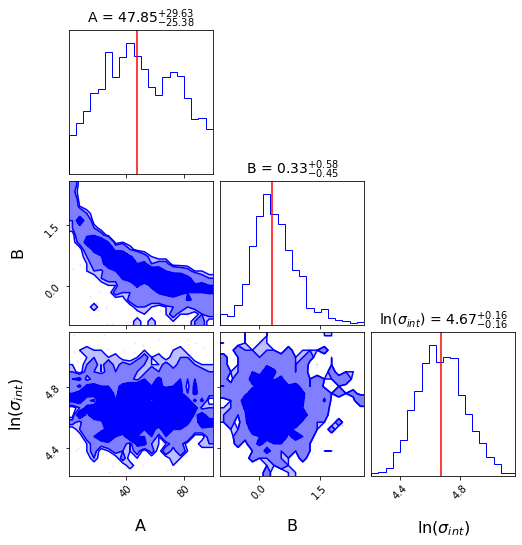

In [6]:


i=2
nboot=10000

#print (a[i], b[i], "BCES fit parameters")

def logl(params):
    A,B,logf=params
    model = A*((1+x)**B)
    f=np.exp(logf)
    #sig_i=(eat/at)**2+(m*(eab/ab))**2+sig**2
    #return -0.5 * np.sum((np.log(at) - (m*np.log(ab)+c)) ** 2 / sig_i  + np.log(sig_i))

    sigma2=(yerr)**2+ f**2      #unbinned data
    return -0.5 * np.sum((y-model) ** 2 / sigma2  + np.log(sigma2))     #returns the log likelihood



   

def log_prior(params):
    A, B,logf = params
    if 0 < A < 100 and -1 < B < 4 and -1 < logf < 6:      #priors on A, B and logf. You can fiddle around with these to obtain closed contours.
        return 0.0
    return -np.inf

def log_posterior(params):
    lp = log_prior(params)
    if not np.isfinite(lp):
        return -np.inf
    return lp + logl(params)            #returns the log posterior 

v2=np.array([15,1,0.1])
print (logl(v2))
   
Nens = 100 
mini = np.random.uniform(-0.5, 25, Nens)
bini=np.random.uniform(-1, 4, Nens)
sini=np.random.uniform(-3,3,Nens)
params=[10.97,1,0.1]
neg_logl = lambda theta: -logl(theta)
result=optimize.minimize(neg_logl,params)
print (result.x)
print (logl(result.x))

inisamples = np.array([mini, bini,sini]).T # initial samples
ndims = inisamples.shape[1] # number of parameters/dimensions

Nburnin = 200   # number of burn-in samples
Nsamples = 200  # number of final posterior samples

sampler = emcee.EnsembleSampler(Nens, ndims, log_posterior)
t0 = time() # start time
sampler.run_mcmc(inisamples, Nsamples+Nburnin,progress=True);
t1 = time()
timeemcee = (t1-t0)
print("Time taken to run 'emcee' is {} seconds".format(timeemcee))

# extract the samples (removing the burn-in)
labels=["A", "B", "ln($\sigma_{int}$)"]
samples_emcee = sampler.chain[:, Nburnin:, :].reshape((-1, ndims))
print (samples_emcee.shape)
#tau = sampler.get_autocorr_time()
#print(tau)
flat_samples = sampler.get_chain(discard=Nburnin, thin=15, flat=True)

#FF = open("tempnopcut.pkl", "wb")
#pickle.dump(flat_samples,FF)
#FF.close()

value2 = np.median(flat_samples, axis=0)
fig = corner.corner(flat_samples, labels=labels, levels=(0.68,0.95,0.99),color = 'b',alpha=0.1,fill_contours = 1,show_titles=True,title_fmt='.2f',max_n_ticks = 3, title_kwargs={"fontsize": 14},label_kwargs={"fontsize": 16},contour_kwargs={"color": 'r'})
# Extract the axes
axes = np.array(fig.axes).reshape((ndims, ndims))

# Loop over the diagonal
for i in range(ndims):
 ax = axes[i, i]
 ax.axvline(value2[i], color="r")

 
ax = axes[1,0]
#ax.axvline(x=0.0, color="k", linestyle='--')
#ax.axhline(y=1.0, color="k", linestyle='--')
         
plt.savefig("contour_T90_vs_(1+z)_unbinned.pdf")
#plt.savefig("contour_T90_vs_(1+z)_with_significant_deviation.pdf")

v=np.zeros(ndims)
for i in range(ndims):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    v[i]=mcmc[1]
    q = np.diff(mcmc)
    print (mcmc[1],q[0],q[1],labels[i] )
#    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
#    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
#    display(Math(txt))
print (v)
print (logl(v))
exit(0)



NameError: name 'r' is not defined

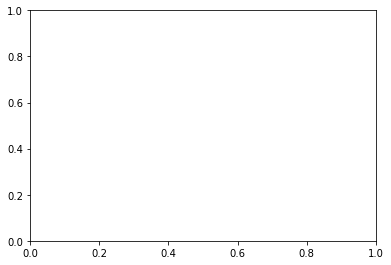

In [3]:
plt.figure()
ax=plt.axes([0.17,0.17,0.8,0.8])
rc=np.linspace(2,6,500)
#rc=np.linspace(0.5,2.5,500)
plt.errorbar(np.log(r*1e3),np.log(rho/1e18),yerr=e_rho/rho,xerr=e_rc/r, fmt="or",ms=5,ecolor="r", capsize=2.5, label="Cluster data")
plt.plot(rc, f(rc, a[i], b[i]),'k',lw=3,label='Our fit')
#plt.plot(rc, f(rc, -1.47, 0.75),lw=2,label='single beta')
plt.plot(rc, f(rc, -1.46, 0.88),lw=3,label='Chan (double beta)')
#plt.plot(rc, f(rc, -1.30, 0.60),label='cooling flow')
#plt.plot(rc, f(rc, -1.50, 0.96),label='Non-cooling flow')
plt.plot(rc, f(rc, -1.64, 1.58),lw=3,label='Shan et. al')

plt.xlabel(r"log $r_c(kpc)$",fontsize=24)
plt.ylabel(r"log $\rho_{c}(M_{\odot}pc^{-3})$",fontsize=24)
plt.legend()
plt.savefig('sc.png')
plt.show()
